# Taylor Series

In [138]:
import numpy as np
import matplotlib.pyplot as plt
import time
import warnings

warnings.filterwarnings("ignore")

num_steps = 100000

### First-order ODE:

 y' = 2x + 1, y(0) = 0


#### Exact solution

y(x) = x (x + 1)

N: 100000
Time taken by Taylor Series method: 91.5968
Per Mean error: 0.0092


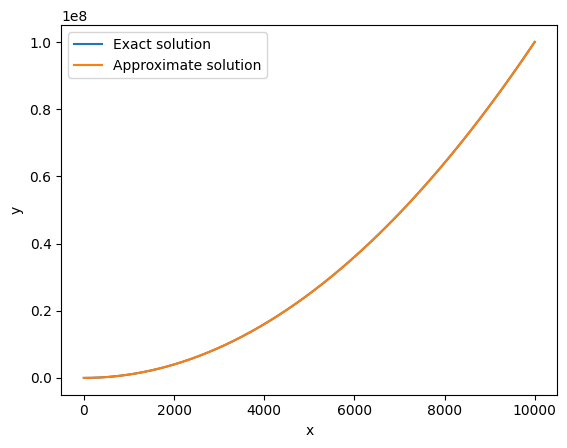

In [139]:
# Define the ODE
def func(x, y):
    return 2*x + 1

# Define the exact solution
def exact_solution(x):
    return x*(x + 1)

# Define the Taylor series approximation function
def taylor_series(x0, y0, h, num_steps):
    t0 = time.time()
    t = np.zeros(num_steps + 1)
    y = np.zeros(num_steps + 1)
    y[0] = y0
    t[0] = x0
    for i in range(num_steps):
        y[i+1] = y[i] + h*func(t[i], y[i])
        t[i+1] = t[i] + h
    t1 = time.time()
    return y, t, (t1-t0)*1000

# Set the initial conditions and step size
x0, y0, h = 0, 0, 0.1
# num_steps = 10000

# Calculate the approximate solution using Taylor Series method
approx_sol, t, taylor_time = taylor_series(x0, y0, h, num_steps)

# Calculate the exact solution
exact_sol = exact_solution(t)

# Calculate the tolerance value between the exact and approximate solutions
tolerance = np.abs(exact_sol - approx_sol)
per_error = np.mean(np.abs(tolerance/exact_sol)[1:])*100

# Print the time taken by each method
print(f"N: {num_steps}")
print(f"Time taken by Taylor Series method: {taylor_time:.4f}")
print(f"Per Mean error: {per_error:.4f}")


# Plot the comparison between the exact and approximate solutions
plt.plot(t, exact_sol, label='Exact solution')
plt.plot(t, approx_sol, label='Approximate solution')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()


### Second-order ODE:

y'' + y = sin(x), y(0) = 0, y'(0) = 1

N: 100000
Time taken for Taylor Series Method: 960.5310 milliseconds
Per Mean error: 300.4830


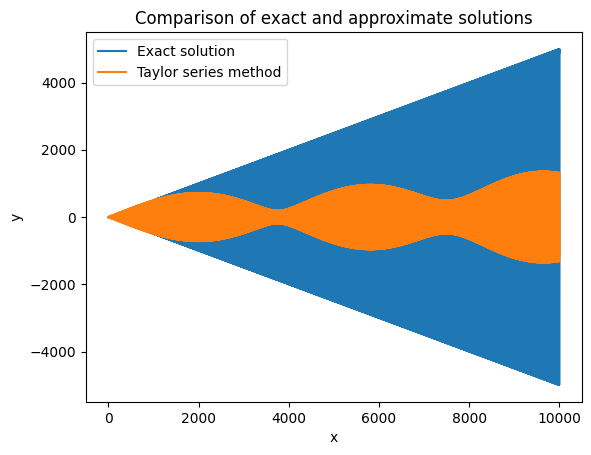

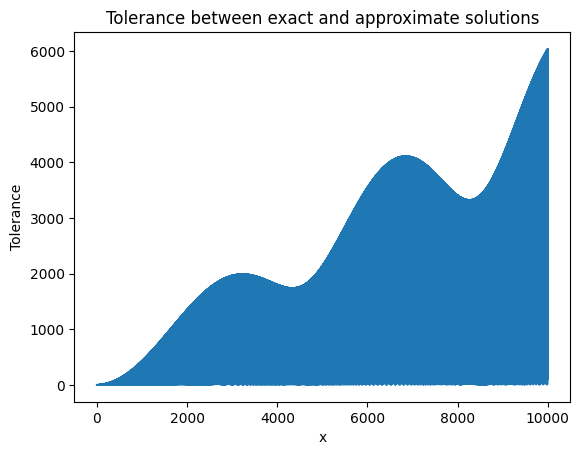

In [146]:
# Define the differential equation
def func(y, x):
    return np.array([y[1], -y[0] + np.sin(x)])

# Define the exact solution
def exact_sol(x):
    return 0.5*(3*np.sin(x)-x*np.cos(x))

# Define the Taylor series method for approximating the solution
def taylor_series(x0, y0, h, n):
    y = np.zeros((n, 2))
    y[0] = y0
    for i in range(1, n):
        x = x0 + i*h
        y[i] = y[i-1] + \
            h*func(y[i-1], x) + \
                ((h**2)/np.math.factorial(2))*func(func(y[i-1], x), x)
    return y

# Set initial conditions and step size
x0 = 0
y0 = np.array([0, 1])
h = 0.1
# num_steps = 1000

# Compute the approximate solution using Taylor series method
start_time = time.time()
y_taylor = taylor_series(x0, y0, h, num_steps)
taylor_time = (time.time() - start_time) * 1000

# Compute the exact solution
x = np.linspace(x0, x0+(num_steps-1)*h, num_steps)
y_exact = exact_sol(x)

# Compute the tolerance between the exact and approximate solutions
tolerance = np.abs(y_exact - y_taylor[:, 0])
per_error = np.mean(np.abs(tolerance/y_exact)[1:])*100

# Print the time taken by each method
print(f"N: {num_steps}")
print(f'Time taken for Taylor Series Method: {taylor_time:.4f} milliseconds')
print(f"Per Mean error: {per_error:.4f}")

# Plot the results
plt.plot(x, y_exact, label='Exact solution')
plt.plot(x, y_taylor[:, 0], label='Taylor series method')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Comparison of exact and approximate solutions')
plt.legend()
plt.show()

# Plot the tolerance
plt.plot(x, tolerance)
plt.xlabel('x')
plt.ylabel('Tolerance')
plt.title('Tolerance between exact and approximate solutions')
plt.show()



### Third-order ODE:

y''' + y'' + y' + y = 2x - 1, y(0) = 1, y'(0) = 0, y''(0) = 0

N: 100000
Time taken for Taylor Series Method: 1594.6002 milliseconds
Per Mean error: 5.1732


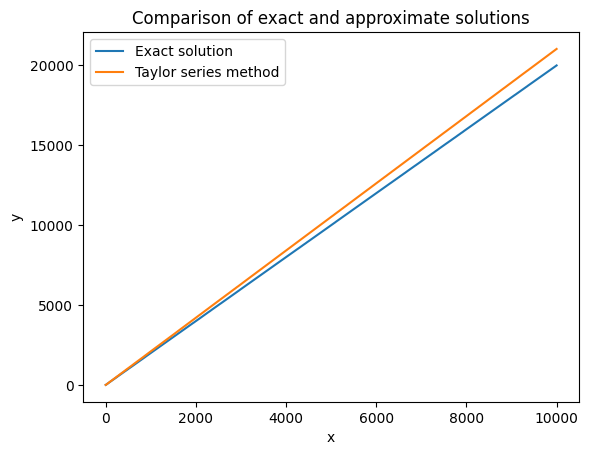

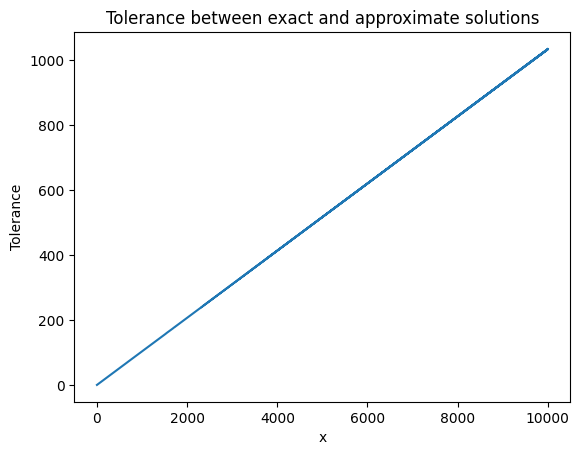

In [145]:
# Define the differential equation
def diff_eq(y, x):
# y''' + y'' + y' + y = 2x - 1, y(0) = 1, y'(0) = 0, y''(0) = 0
    return np.array([y[1], y[2], 2*x - 1 - y[0] - y[1] - y[2]])

# Define the exact solution
def exact_sol(x):
    return 2*x + 2*np.exp(-x) + 2*np.cos(x) - 3

# Define the Taylor series method for approximating the solution
def taylor_series(x0, y0, h, n):
    y = np.zeros((n, 3))
    y[0] = y0
    for i in range(1, n):
        x = x0 + i*h
        y[i] = y[i-1] + \
            h*diff_eq(y[i-1], x) + \
                ((h**2)/np.math.factorial(2))*diff_eq(diff_eq(y[i-1], x), x) + \
                    ((h**3)/np.math.factorial(3))*diff_eq(diff_eq(diff_eq(y[i-1], x), x), x)
    return y

# Set initial conditions and step size
x0 = 0
y0 = np.array([1, 0, 0])
h = 0.1
# num_steps = 10000

# Compute the approximate solution using Taylor series method
start_time = time.time()
y_taylor = taylor_series(x0, y0, h,num_steps)
taylor_time = (time.time() - start_time) * 1000

# Compute the exact solution
x = np.linspace(x0, x0+(num_steps-1)*h,num_steps)
y_exact = exact_sol(x)

# Compute the tolerance between the exact and approximate solutions
tolerance = np.abs(y_exact - y_taylor[:, 0])
per_error = np.mean(np.abs(tolerance/y_exact)[1:])*100

# Print the time taken by each method
print(f"N: {num_steps}")
print(f'Time taken for Taylor Series Method: {taylor_time:.4f} milliseconds')
print(f"Per Mean error: {per_error:.4f}")

# Plot the results
plt.plot(x, y_exact, label='Exact solution')
plt.plot(x, y_taylor[:, 0], label='Taylor series method')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Comparison of exact and approximate solutions')
plt.legend()
plt.show()

# Plot the tolerance
plt.plot(x, tolerance)
plt.xlabel('x')
plt.ylabel('Tolerance')
plt.title('Tolerance between exact and approximate solutions')
plt.show()


### Fourth-order ODE:

y'''' + 4y'' + 4y = 0, y(0) = 1, y'(0) = 0, 
y''(0) = 0, y'''(0) = -4

N: 100000
Time taken for Taylor Series Method: 2302.2702 milliseconds
Per Mean error: 27.1899


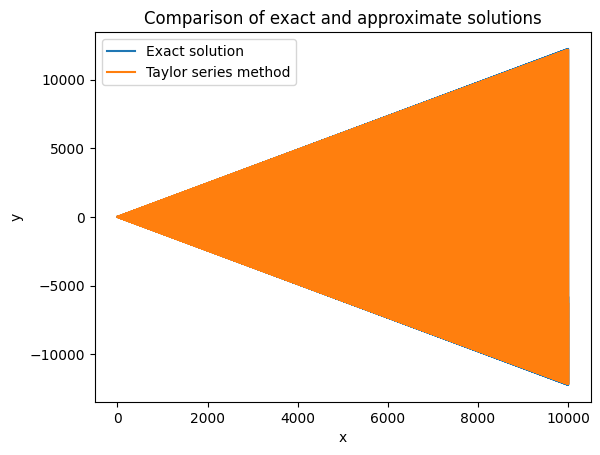

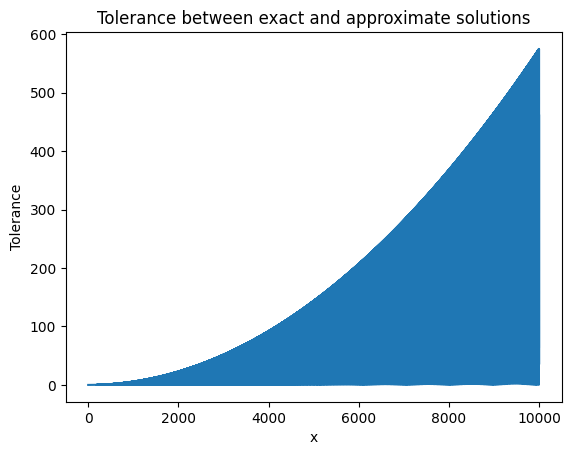

In [142]:
# Define the differential equation
def diff_eq(y, x):
# y'''' + 4y'' + 4y = 0, y(0) = 1, y'(0) = 0, y''(0) = 0, y'''(0) = -4
# f = @(t, y) [y(2); y(3); y(4); -4*y(3) - 4*y(1)];
    return np.array([y[1], y[2], y[3], -4*y[2]-4*y[0]])

# Define the exact solution
def exact_sol(x):
    return ((x-1)*np.sin(np.sqrt(2)*x))/np.sqrt(2) + (x+1)*np.cos(np.sqrt(2)*x)

# Define the Taylor series method for approximating the solution
def taylor_series(x0, y0, h, n):
    y = np.zeros((n, 4))
    y[0] = y0
    for i in range(1, n):
        x = x0 + i*h
        y[i] = y[i-1] + \
            h*diff_eq(y[i-1], x) + \
                ((h**2)/np.math.factorial(2))*diff_eq(diff_eq(y[i-1], x), x) + \
                    ((h**3)/np.math.factorial(3))*diff_eq(diff_eq(diff_eq(y[i-1], x), x), x) + \
                        ((h**4)/np.math.factorial(4))*diff_eq(diff_eq(diff_eq(diff_eq(y[i-1], x), x), x), x)
    return y

# Set initial conditions and step size
x0 = 0
y0 = np.array([1, 0, 0, -4])
h = 0.1
# num_steps = 1000

# Compute the approximate solution using Taylor series method
start_time = time.time()
y_taylor = taylor_series(x0, y0, h, num_steps)
taylor_time = (time.time() - start_time)*1000

# Compute the exact solution
x = np.linspace(x0, x0+(num_steps-1)*h, num_steps)
y_exact = exact_sol(x)

# Compute the tolerance between the exact and approximate solutions
tolerance = np.abs(y_exact - y_taylor[:, 0])
per_error = np.mean(np.abs(tolerance/y_exact)[1:])*100

# Print the time taken by each method
print(f"N: {num_steps}")
print(f'Time taken for Taylor Series Method: {taylor_time:.4f} milliseconds')
print(f"Per Mean error: {per_error:.4f}")

# Plot the results
plt.plot(x, y_exact, label='Exact solution')
plt.plot(x, y_taylor[:, 0], label='Taylor series method')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Comparison of exact and approximate solutions')
plt.legend()
plt.show()

# Plot the tolerance
plt.plot(x, tolerance)
plt.xlabel('x')
plt.ylabel('Tolerance')
plt.title('Tolerance between exact and approximate solutions')
plt.show()